# Critical t values
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t

### (1) Definition of confidence level limit

In [2]:
# Return value of x corresponsing to Frequentist upper (one-sided) limit on given CL
# Use 1-CL for lower limit

def problim(ndf,cl):
    
    # Student's t distribution from scipy
    # Use inverse survival function (inverse of 1 - cumulative distribution)

    xlim = t.isf(1-cl,ndf)

    return xlim


### (3) Define considered probability values

In [3]:
# Considered values of probability

pvec = np.array([0.9,0.95,0.99,0.999])

# Considered degrees of freedom

Nmax = 20

nvec = np.arange(1,Nmax+1)


### (3)  Calculate critical t curves

In [4]:
ttab = np.empty((pvec.size,nvec.size))

for ip in range(pvec.size) :
    cl = pvec[ip]
    ttab[ip,:] = problim(nvec,cl)


### (4) Draw critical F-test curves

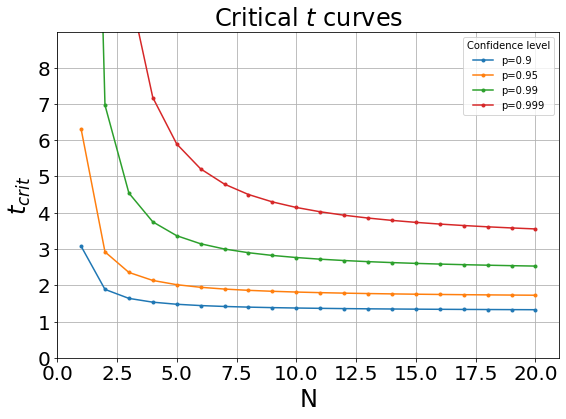

In [5]:
# Histogram frame

Xmin=0
Xmax=Nmax+1
Ymin=0
Ymax=8.99   #  1.1*np.max(ttab)

# Plot curves

plt.figure(figsize=(9, 6))

for ip in range(pvec.size) :
    cl = pvec[ip]
    plt.plot(nvec,ttab[ip,:],'.-',label='p='+str(cl))


plt.title('Critical $t$ curves',size=24)
plt.xlabel('N',size=24)
plt.ylabel('$t_{crit}$',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')
plt.legend(title="Confidence level")

fname = '08_t-limit.png'
plt.savefig(fname)

plt.show()